## This is for capstone project to complete Coursera's IBM Data Science Certificate

### Author: Tansaya Kunaratskul


### Table of Content
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
    * [K-Means Clustering](#kmeans)
    * [Hierachical Clustering](#h)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

<a id='introduction'></a>
## Introduction: Business Problem

<br>This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

We want to cluser the credit card customers into segments using the attributes provided. Given the cluster, we hope to see if there are certain customer behaviors we can extract from each cluster and thus, the company will be able to offer personalized financial products for each of them.

<a id='data'></a>
## Data
<br>There are total of 8950 active credit cards in our data sets in the last 6 months. For the data, we have transactin behaviors for each one.

Following is the Data Dictionary for Credit Card dataset :-
1. CUSTID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFFPURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES : Amount of purchase done in installment
7. CASHADVANCE : Cash in advance given by the user
8. PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11.  CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12.CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13. PURCHASESTRX : Numbe of purchase transactions made
14. CREDITLIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user
17. PRCFULLPAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user

In [2]:
# import necessary libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import KMeans 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn import preprocessing
%matplotlib inline

In [3]:
# import data
df = pd.read_csv ('CC GENERAL.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# look at the data type and the statistical summary for each variable
print(df.dtypes)
print(df.describe())

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.

In [4]:
# Data Cleaning
# see if there is any NaN
missing_data = df.isnull()
missing_data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

CUST_ID
False    8950
Name: CUST_ID, dtype: int64

BALANCE
False    8950
Name: BALANCE, dtype: int64

BALANCE_FREQUENCY
False    8950
Name: BALANCE_FREQUENCY, dtype: int64

PURCHASES
False    8950
Name: PURCHASES, dtype: int64

ONEOFF_PURCHASES
False    8950
Name: ONEOFF_PURCHASES, dtype: int64

INSTALLMENTS_PURCHASES
False    8950
Name: INSTALLMENTS_PURCHASES, dtype: int64

CASH_ADVANCE
False    8950
Name: CASH_ADVANCE, dtype: int64

PURCHASES_FREQUENCY
False    8950
Name: PURCHASES_FREQUENCY, dtype: int64

ONEOFF_PURCHASES_FREQUENCY
False    8950
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: int64

PURCHASES_INSTALLMENTS_FREQUENCY
False    8950
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: int64

CASH_ADVANCE_FREQUENCY
False    8950
Name: CASH_ADVANCE_FREQUENCY, dtype: int64

CASH_ADVANCE_TRX
False    8950
Name: CASH_ADVANCE_TRX, dtype: int64

PURCHASES_TRX
False    8950
Name: PURCHASES_TRX, dtype: int64

CREDIT_LIMIT
False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

PAYMENTS

We see that for te variable 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT', there are missing values. 

<br> To deal with the missing values, we will replace by <b>the average number</b>

In [4]:
#Replace average for 'MINIMUM_PAYMENTS' 
avg_min_payment = df["MINIMUM_PAYMENTS"].astype("float").mean(axis=0)
print("Average of MINIMUM_PAYMENTS:", avg_min_payment)

Average of MINIMUM_PAYMENTS: 864.2065423050828


In [5]:
# Replace NaN with the average
df["MINIMUM_PAYMENTS"].replace(np.nan, avg_min_payment, inplace=True)

In [6]:
# Do the same with 'CREDIT_LIMIT'
avg_credit_limit = df["CREDIT_LIMIT"].astype("float").mean(axis=0)
print("Average of CREDIT_LIMIT:", avg_credit_limit)

Average of CREDIT_LIMIT: 4494.449450364621


In [7]:
# Replace NaN with the average
df["CREDIT_LIMIT"].replace(np.nan, avg_credit_limit, inplace=True)

### Data Exploration

We know visualize to see the relatioship between variables

In [10]:
# Pearson Correlation Table
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


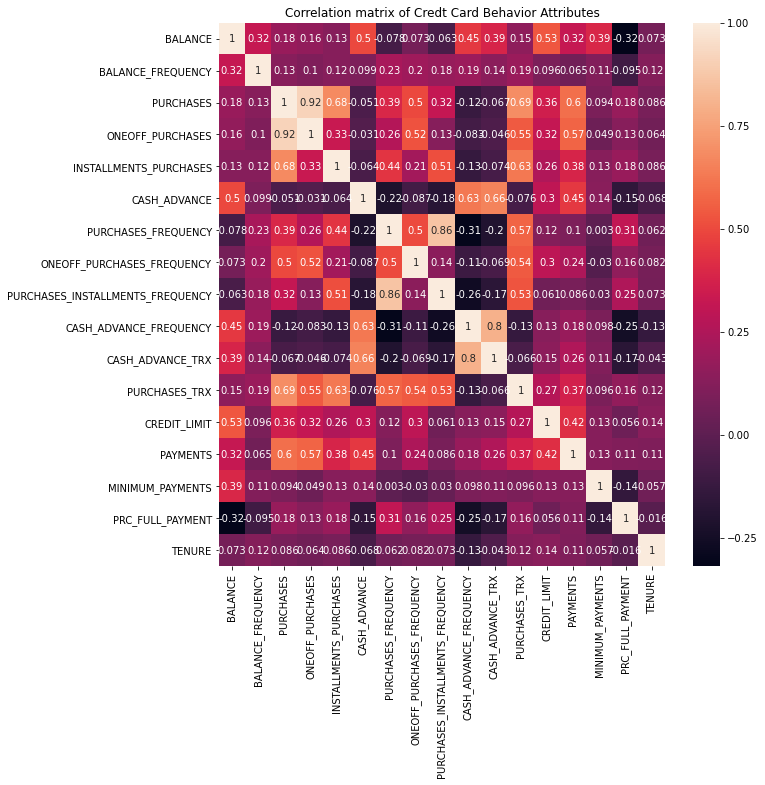

In [29]:
import seaborn as sn
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlation matrix of Credt Card Behavior Attributes")
plt.show()

<AxesSubplot:xlabel='BALANCE', ylabel='PAYMENTS'>

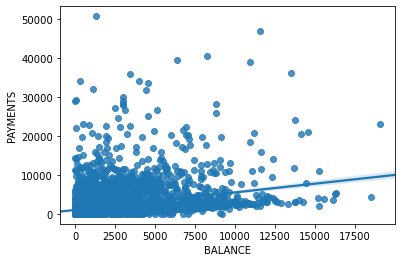

In [28]:
# See the relationship between Balance and Payments
sn.regplot(x="BALANCE", y="PAYMENTS", data=df)

<AxesSubplot:xlabel='BALANCE', ylabel='CASH_ADVANCE'>

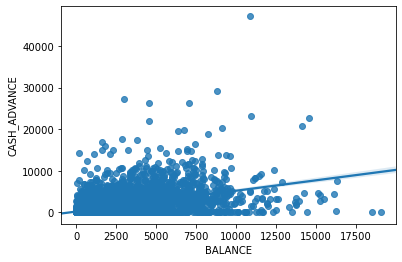

In [31]:
# See the relationship between Balance and Cash Advance
sn.regplot(x="BALANCE", y="CASH_ADVANCE", data=df)

In [20]:
import seaborn as sn

<AxesSubplot:xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

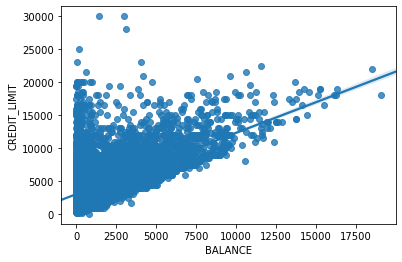

In [32]:
# See the relationship between Balance and Credit Limit
sn.regplot(x="BALANCE", y="CREDIT_LIMIT", data=df)

<AxesSubplot:xlabel='BALANCE', ylabel='INSTALLMENTS_PURCHASES'>

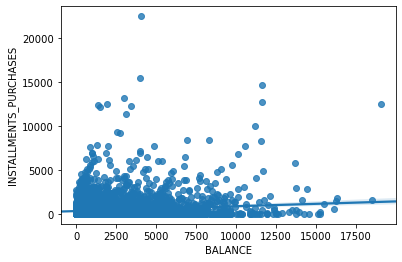

In [21]:
# See the relationship between Balance and Install paymet
sn.regplot(x="BALANCE", y="INSTALLMENTS_PURCHASES", data=df)

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

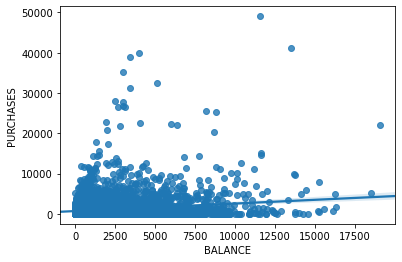

In [22]:
# See the relationship between Balance and Purchases
sn.regplot(x="BALANCE", y="PURCHASES", data=df)

<a id='methodology'></a>
## Methodology 
<br> Given 18 credit card behavioral factors, we determine to cluser them in order to see if there are certain patterns that emerge from each cluser. For this project, we will use 3 clustering methods that we learned:
<br>1) K-Means Clustering
<br>2) Hierachical Clustering
<br>3) Density-based Clustering

<a id='kmeans'></a>

### 1) K-Means Clustering 
We start by normalizing over the standard deviation by using <b>StandardScaler()</b> to normalize our dataset.

In [8]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

#### Modeling
Lets apply k-means on our dataset, and take look at cluster labels.

In [9]:
# Set number of cluster to 4
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [10]:
#Label the cluster number to the attributes
df["Clus_km"] = labels
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clus_km
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


We can easily check the centroid values by averaging the features in each cluster.

In [11]:
df.groupby('Clus_km').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clus_km,,,,,,,,,,,,,,,,,
0,854.783830,0.854286,604.093390,312.547748,291.844381,494.661088,0.467725,0.154194,0.352412,0.106735,2.252185,10.674536,2747.641888,997.017802,585.051167,0.157056,11.433083
1,4797.203573,0.908474,10470.723657,7392.990149,3077.897687,5389.983323,0.737381,0.582883,0.592930,0.229106,9.186567,83.791045,12470.522388,17990.694944,2462.059519,0.326800,11.843284
2,3394.448104,0.940832,1585.305325,991.236297,594.381260,2098.545319,0.540278,0.317523,0.385293,0.210472,5.737026,22.152202,8997.559767,2877.164077,1564.955874,0.134095,11.737898


Let's look at the balance and cash advance

In [15]:
df.groupby('Clus_km').count()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clus_km,,,,,,,,,,,,,,,,,,
0,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523,6523
1,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
2,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293


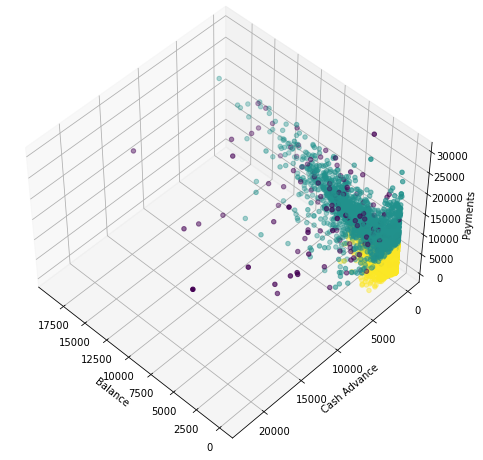

In [50]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Balance')
ax.set_ylabel('Cash Advance')
ax.set_zlabel('Payments')

ax.scatter(X[:, 0], X[:, 4], X[:, 12], c= labels.astype(np.float))

### Cluster Intepretations

From the data and visualizaiton of the clustering results, we can label those clusters as:
<br><br>Cluster 0 (6523 customers)= Frugal: they have low balance, and thus seem to make less purchases, payments and cash davances
<br>Cluser 1 (134 customers)=  High-balance, but Buget-wary: they have more balance than cluster 2, but they seem more cautious in their spending than <br>Cluster 2. They also make significant more installment purchases. But we see the positive correlation wit balance and cash advance, credit limit and payments.
<br>Cluster 2 (2293 customers)= Big spender: although on average they have lower balance than Cluster 1, they make more purchases and payments and opt for cash advance for frequently

<a id='h'></a>
## 2) Hierichical Clustering

We use Agglomrative clustering

### Feature Selection
First, we feature-select

In [16]:
featureset = df[['BALANCE',  'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']]

### Normalization
Now we can normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one

In [17]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.00214779, 0.00194537, 0.00424   , 0.        , 0.03171953,
        0.00397863],
       [0.1681691 , 0.        , 0.        , 0.13668491, 0.23205342,
        0.08089339],
       [0.13102614, 0.01576625, 0.        , 0.        , 0.24874791,
        0.01226436],
       [0.08752079, 0.03056715, 0.        , 0.00436572, 0.24874791,
        0.        ],
       [0.0429401 , 0.00032627, 0.        , 0.        , 0.03839733,
        0.01337372]])

### Clustering using scikit-learn


In [18]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.30383737 0.25295967 ... 0.00349754 0.01765801 0.0281946 ]
 [0.30383737 0.         0.15905844 ... 0.30499583 0.31621751 0.29047876]
 [0.25295967 0.15905844 0.         ... 0.25351124 0.26829981 0.23841293]
 ...
 [0.00349754 0.30499583 0.25351124 ... 0.         0.01815927 0.02835508]
 [0.01765801 0.31621751 0.26829981 ... 0.01815927 0.         0.03745493]
 [0.0281946  0.29047876 0.23841293 ... 0.02835508 0.03745493 0.        ]]


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach.

In [19]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, ..., 1, 1, 1])

Add cluster label in the data set

In [20]:
df['cluster_agglom'] = agglom.labels_
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clus_km,cluster_agglom
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,1


In [21]:
df.groupby('cluster_agglom').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clus_km
cluster_agglom,,,,,,,,,,,,,,,,,,
0,5619.153410,0.944269,27109.586957,20827.842609,6281.744348,125.612921,0.912319,0.792029,0.726812,0.014493,0.304348,123.391304,17065.217391,27453.821256,3198.756157,0.468215,11.913043,1.000000
1,1542.080836,0.876877,929.535412,535.264708,394.572301,939.700317,0.488951,0.200546,0.363129,0.134429,3.198361,14.368321,4442.211785,1621.394824,854.498518,0.152883,11.516053,0.525034
2,7155.425798,0.980861,3940.068947,2901.898421,1038.170526,20376.680846,0.635566,0.384940,0.539132,0.616427,30.473684,43.263158,13768.421053,22990.236732,2589.703553,0.162881,11.631579,1.052632


In [24]:
df.groupby('cluster_agglom').count()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clus_km
cluster_agglom,,,,,,,,,,,,,,,,,,,
0,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908
2,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'CASH_ADVANCE')

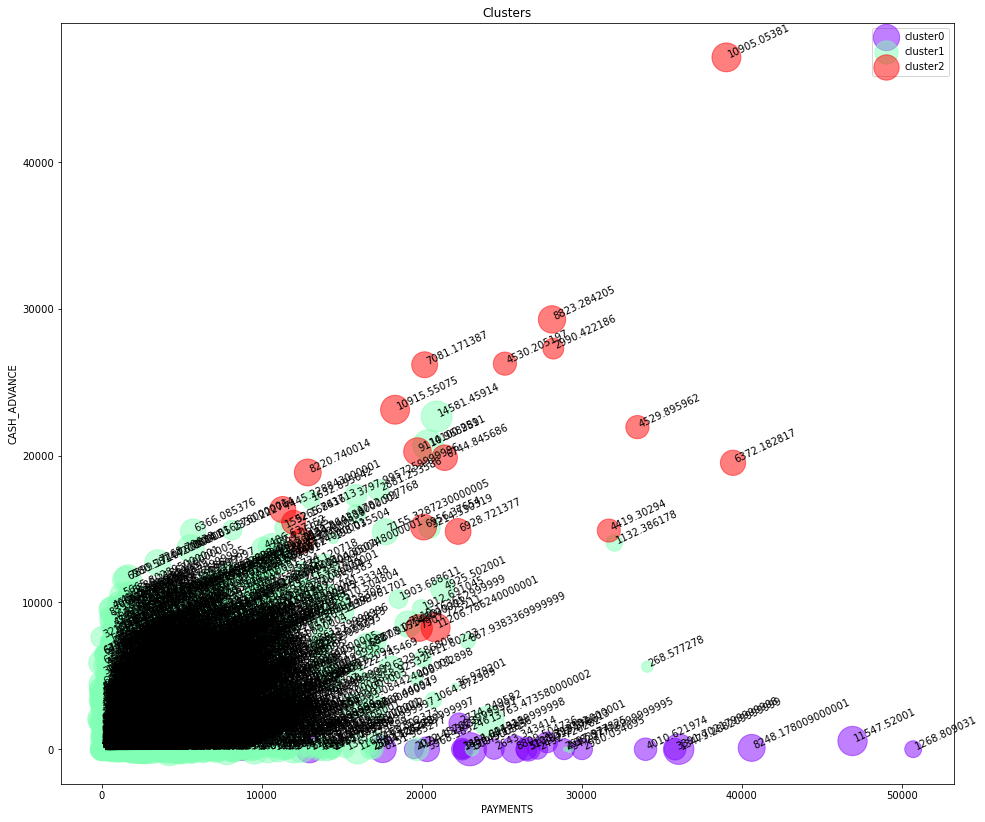

In [22]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_agglom == label]
    for i in subset.index:
            plt.text(subset.PAYMENTS[i], subset.CASH_ADVANCE[i],str(subset['BALANCE'][i]), rotation=25) 
    plt.scatter(subset.PAYMENTS, subset.CASH_ADVANCE, s= np.sqrt(subset.BALANCE)*8, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('PAYMENTS')
plt.ylabel('CASH_ADVANCE')

For Hierarchical Clustering, we can interpret the clusters as follows:
Cluster 0 (23 customers)= ‘Install Payment’ type: They have higher credit-limit than Cluster 2 and highest install payments than the rest of the clusters. Average balance is $5,620.
Cluster 1 (8908 customers)= ‘Cash advance’ type: They actually make more cash advance than Cluster 0.  Average balance is $1,542
Cluster 2 (19 customers) = ‘High-Balance’ type: Average balance is $7,200

The End!